**LetsGrowMore Virtual Internship Program (December-2021)**

**Beginner Level Task 1**

Name :- Shwetark Deshpande

Task 2 :- Stock Market Prediction and Forecasting using Stacked LSTM

**IMPORT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**LOADING DATA**

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
df=data.reset_index()
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


**CLOSE VALUE GRAPH**

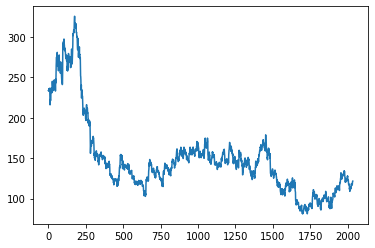

In [5]:
d_close = df['Close']
plt.plot(d_close)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
d_close=scaler.fit_transform(np.array(d_close).reshape(-1,1))
d_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

**SPLITTING INTO TRAINING & TESTING DATA**

In [7]:
training_size=int(len(d_close)*0.72)
test_size=len(d_close)-training_size
train_data=d_close[0:training_size,:]
test_data=d_close[training_size:len(d_close),:1]

**DATA PREPROCESSING**

In [8]:
def create_dataset(dataset, time_step=1):
    x_data= []
    y_data= []
    for i in range(len(dataset)-time_step-1):
      x_data.append(dataset[i:(i+time_step), 0])
      y_data.append(dataset[i + time_step, 0])
      return np.array(x_data), np.array(y_data)

In [9]:
time_step = 100
x_train,y_train = create_dataset(train_data, time_step)
x_test, y_test= create_dataset(test_data, time_step)

In [10]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_train.shape

(1, 100, 1)

In [11]:
y_train.shape

(1,)

**IMPORTING REQUIRED MODULES FOR LSTM**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [13]:
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))

regressor.add(LSTM(units=50,return_sequences=True))

regressor.add(LSTM(units=50))

regressor.add(Dense(1))
regressor.compile(loss='mean_squared_error',optimizer='adam')
regressor.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.8281 - val_loss: 0.0041
Epoch 2/100
1/1 [==============================] - 0s 113ms/step - loss: 0.6351 - val_loss: 5.5438e-04
Epoch 3/100
1/1 [==============================] - 0s 100ms/step - loss: 0.4617 - val_loss: 6.1002e-04
Epoch 4/100
1/1 [==============================] - 0s 113ms/step - loss: 0.2946 - val_loss: 0.0074
Epoch 5/100
1/1 [==============================] - 0s 102ms/step - loss: 0.1391 - val_loss: 0.0284
Epoch 6/100
1/1 [==============================] - 0s 103ms/step - loss: 0.0244 - val_loss: 0.0769
Epoch 7/100
1/1 [==============================] - 0s 99ms/step - loss: 0.0118 - val_loss: 0.1415
Epoch 8/100
1/1 [==============================] - 0s 97ms/step - loss: 0.0987 - val_loss: 0.1621
Epoch 9/100
1/1 [==============================] - 0s 99ms/step - loss: 0.1187 - val_loss: 0.1434
Epoch 10/100
1/1 [==============================] - 0s 99ms/step - loss: 0.0768 - val_loss: 0.1114
Epoch 11

In [14]:
train_predict=regressor.predict(x_train)
test_predict=regressor.predict(x_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

**RMSE PERFORMANCE MATRICES**

In [15]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train ,train_predict))

293.5842640197355

**TEST DATA RMSE**

In [16]:
math.sqrt(mean_squared_error(y_test,test_predict))

186.42443827710122

**SHIFTING TRAIN PREDICTIONS FOR PLOTTING**

In [17]:
look_back = 100
train_predict_plot = np.empty_like(d_close)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

**SHIFTING TEST PREDICTIONS FOR PLOTTING**

In [18]:
test_predict_plot = np.empty_like(d_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(d_close)-1, :] = test_predict

**PLOT**

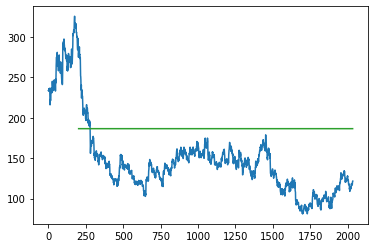

In [19]:
plt.plot(scaler.inverse_transform(d_close))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [20]:
len(test_data), x_test.shape

(570, (1, 100, 1))

In [22]:
x_input = test_data[470:].reshape(1,-1)
x_input.shape

(1, 100)

In [23]:
tem_input = list(x_input)
tem_input = tem_input[0].tolist()

PREDICTION FOR NEXT 50 DAYS

In [24]:
lt_output=[]
n_steps=100
next_No_Of_Days = 40
i=0

while(i<next_No_Of_Days):
    
        if(len(tem_input)>100):
           x_input=np.array(tem_input[1:])
           print("{} day input {}".format(i,x_input))
           x_input=x_input.reshape(1,-1)
           x_input = x_input.reshape((1, n_steps, 1))
           yt = regressor.predict(x_input, verbose=0)
           print("{} day output {}".format(i,yt))
           tem_input.extend(yt[0].tolist())
           tem_input=tem_input[1:]
           lt_output.extend(yt.tolist())
           i=i+1
        else:
           x_input = x_input.reshape((1, n_steps,1))
           yt = regressor.predict(x_input, verbose=0)
           print(yt[0])
           tem_input.extend(yt[0].tolist())
           print(len(tem_input))
           lt_output.extend(yt.tolist())
           i=i+1
    
print(lt_output)

[0.4453479]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.

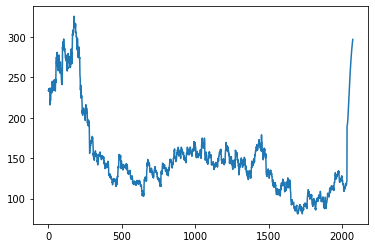

In [25]:
df = d_close.tolist()
df.extend(lt_output)
df=scaler.inverse_transform(df).tolist()
plt.plot(df)